# EDA


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
Path to dataset files: /kaggle/input/new-plant-diseases-dataset


In [2]:
import os
path


'/kaggle/input/new-plant-diseases-dataset'

In [3]:
os.listdir(path)


['New Plant Diseases Dataset(Augmented)',
 'new plant diseases dataset(augmented)',
 'test']

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

# Dataset paths
DATASET_ROOT = path
BASE_DIR = os.path.join(DATASET_ROOT, "New Plant Diseases Dataset(Augmented)", "New Plant Diseases Dataset(Augmented)")
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR   = os.path.join(BASE_DIR, "valid")
TEST_DIR  = os.path.join(BASE_DIR, "test")

print("✓ Imports and paths configured")

✓ Imports and paths configured


In [5]:
# Check directory structure
print("Splits:", os.listdir(BASE_DIR))
print("Number of classes (train):", len(os.listdir(TRAIN_DIR)))

Splits: ['valid', 'train']
Number of classes (train): 38


In [6]:
# Analyze class distribution
records = []
for cls in tqdm(os.listdir(TRAIN_DIR), desc='Analyzing classes'):
    cls_path = os.path.join(TRAIN_DIR, cls)
    n_imgs = len(os.listdir(cls_path))
    records.append((cls, n_imgs))

df = pd.DataFrame(records, columns=["class", "count"]).sort_values("count", ascending=False)
print("\nClass Distribution:")
print(df)

Analyzing classes: 100%|██████████| 38/38 [00:00<00:00, 1110.13it/s]


Class Distribution:
                                                class  count
4                                   Soybean___healthy   2022
13                                 Apple___Apple_scab   2016
3            Orange___Haunglongbing_(Citrus_greening)   2010
27                                    Apple___healthy   2008
22                             Pepper,_bell___healthy   1988
16                                  Apple___Black_rot   1987
14             Tomato___Tomato_Yellow_Leaf_Curl_Virus   1961
29                              Potato___Early_blight   1939
24                               Potato___Late_blight   1939
1                                    Tomato___healthy   1926
32                       Grape___Esca_(Black_Measles)   1920
8                               Tomato___Early_blight   1920
36                      Pepper,_bell___Bacterial_spot   1913
7                 Corn_(maize)___Northern_Leaf_Blight   1908
31                        Corn_(maize)___Common_rust_   1907
28 

In [7]:
# Healthy vs Diseased breakdown
df["label"] = df["class"].str.lower().apply(lambda x: "healthy" if "healthy" in x else "diseased")
label_counts = df.groupby("label")["count"].sum()
print("\nHealthy vs Diseased:")
print(label_counts)

# Visualize distribution
label_counts.plot(kind="bar", figsize=(8, 4), title="Healthy vs Diseased Distribution")
plt.ylabel("Image Count")
plt.xlabel("Label")
plt.tight_layout()
plt.show()


Healthy vs Diseased:
label
diseased    48001
healthy     22294
Name: count, dtype: int64


In [8]:
# Sample image properties
sample_class = df.iloc[0]["class"]
sample_img_path = os.path.join(TRAIN_DIR, sample_class, os.listdir(os.path.join(TRAIN_DIR, sample_class))[0])
img = Image.open(sample_img_path)

print(f"\nSample Image Properties ({sample_class}):")
print(f"  Size: {img.size}")
print(f"  Color mode: {img.mode}")
print(f"  Format: {img.format}")


Sample Image Properties (Soybean___healthy):
  Size: (256, 256)
  Color mode: RGB
  Format: JPEG


Loading sample images: 100%|██████████| 5/5 [00:00<00:00, 310.97it/s]


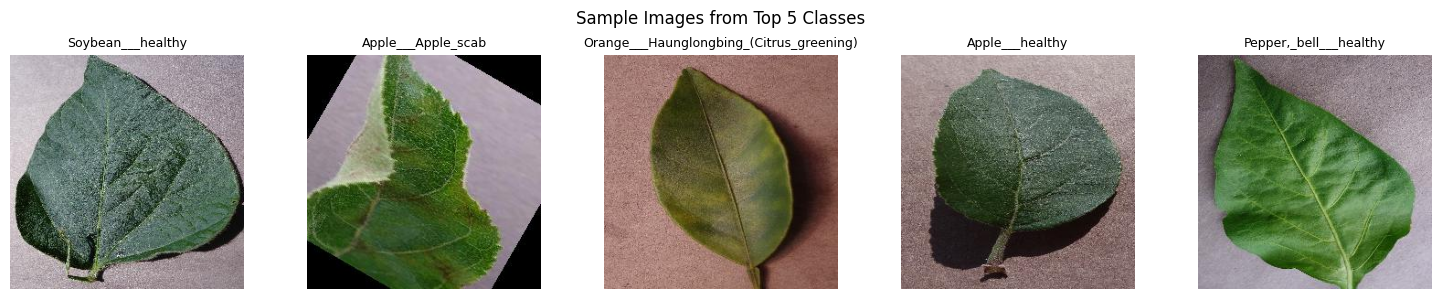

In [9]:
# Visualize example images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for ax, cls in tqdm(zip(axes, df["class"].head(5)), total=5, desc='Loading sample images'):
    img_path = os.path.join(TRAIN_DIR, cls, os.listdir(os.path.join(TRAIN_DIR, cls))[0])
    ax.imshow(Image.open(img_path))
    ax.set_title(cls, fontsize=9)
    ax.axis("off")
plt.suptitle("Sample Images from Top 5 Classes")
plt.tight_layout()
plt.show()

In [10]:
# Find correct paths and validate dataset splits
print("Dataset Split Validation:")
print(f"  train: {TRAIN_DIR} - {'OK' if os.path.exists(TRAIN_DIR) else 'NOT FOUND'}")
print(f"  valid: {VAL_DIR} - {'OK' if os.path.exists(VAL_DIR) else 'NOT FOUND'}")
print(f"  test:  {TEST_DIR} - {'OK' if os.path.exists(TEST_DIR) else 'NOT FOUND'}")

# Search for test folder in alternative locations
test_paths = [
    os.path.join(BASE_DIR, "test"),
    os.path.join(DATASET_ROOT, "test"),
    os.path.join(DATASET_ROOT, "New Plant Diseases Dataset(Augmented)", "test"),
]

print("\nSearching for test folder...")
for p in tqdm(test_paths, desc='Checking paths'):
    if os.path.exists(p):
        print(f"  Found: {p}")
        TEST_DIR = p
        break

print(f"\nFinal TEST_DIR: {TEST_DIR}")
print(f"Test folder exists: {os.path.exists(TEST_DIR)}")

Dataset Split Validation:
  train: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train - OK
  valid: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid - OK
  test:  /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test - NOT FOUND

Searching for test folder...


Checking paths:  33%|███▎      | 1/3 [00:00<00:00, 1318.55it/s]

  Found: /kaggle/input/new-plant-diseases-dataset/test

Final TEST_DIR: /kaggle/input/new-plant-diseases-dataset/test
Test folder exists: True



Plant Species Distribution:
species
Tomato                     18345
Apple                       7771
Corn_(maize)                7316
Grape                       7222
Potato                      5702
Pepper,_bell                3901
Strawberry                  3598
Peach                       3566
Cherry_(including_sour)     3509
Soybean                     2022
Orange                      2010
Blueberry                   1816
Raspberry                   1781
Squash                      1736
Name: count, dtype: int64


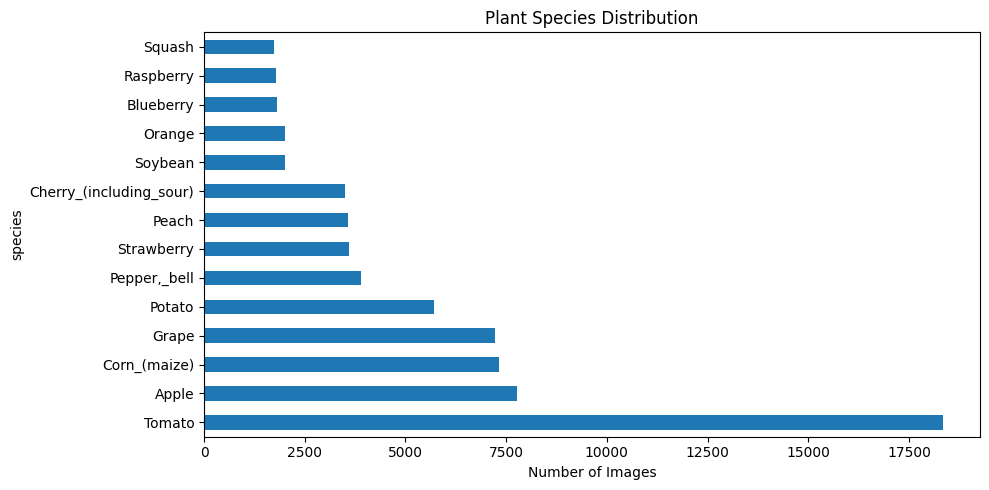


Total unique species: 14
Species list: ['Tomato', 'Apple', 'Corn_(maize)', 'Grape', 'Potato', 'Pepper,_bell', 'Strawberry', 'Peach', 'Cherry_(including_sour)', 'Soybean', 'Orange', 'Blueberry', 'Raspberry', 'Squash']


In [11]:
# Extract plant species from class names
df["species"] = df["class"].str.replace("___", " ").str.split().str[0]

# EDA: Plant Species Breakdown
species_counts = df.groupby("species")["count"].sum().sort_values(ascending=False)
print("\nPlant Species Distribution:")
print(species_counts)

# Visualize species breakdown
species_counts.plot(kind="barh", figsize=(10, 5), title="Plant Species Distribution")
plt.xlabel("Number of Images")
plt.tight_layout()
plt.show()

print(f"\nTotal unique species: {len(species_counts)}")
print(f"Species list: {list(species_counts.index)}")

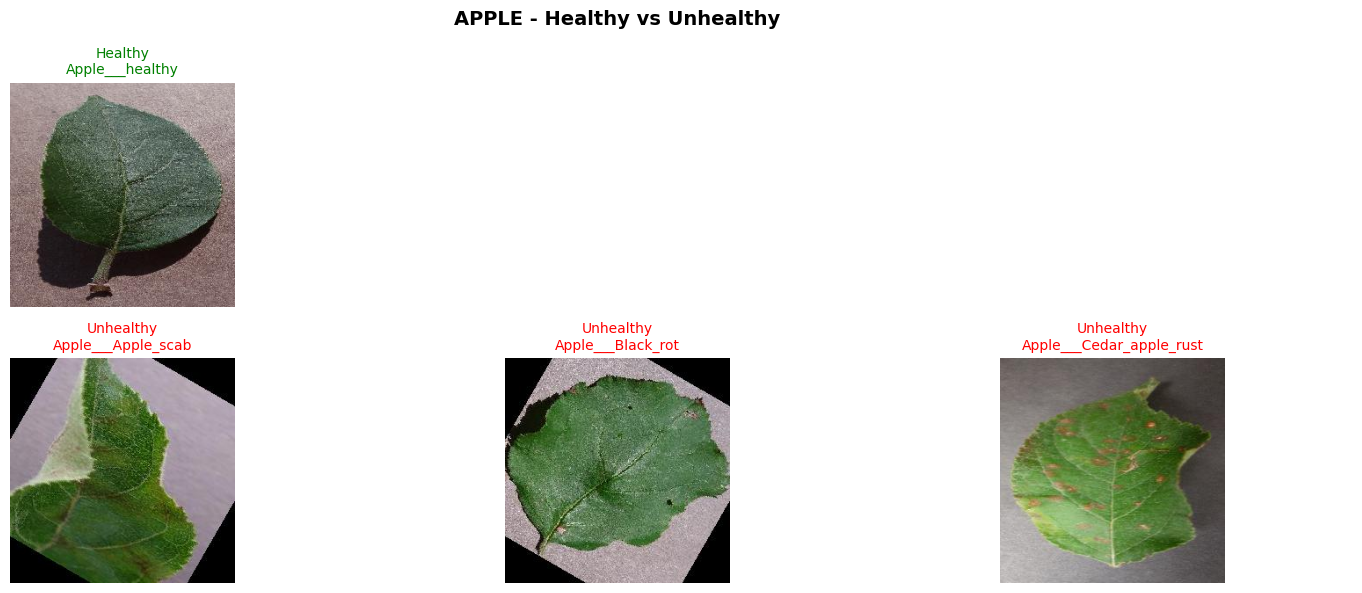

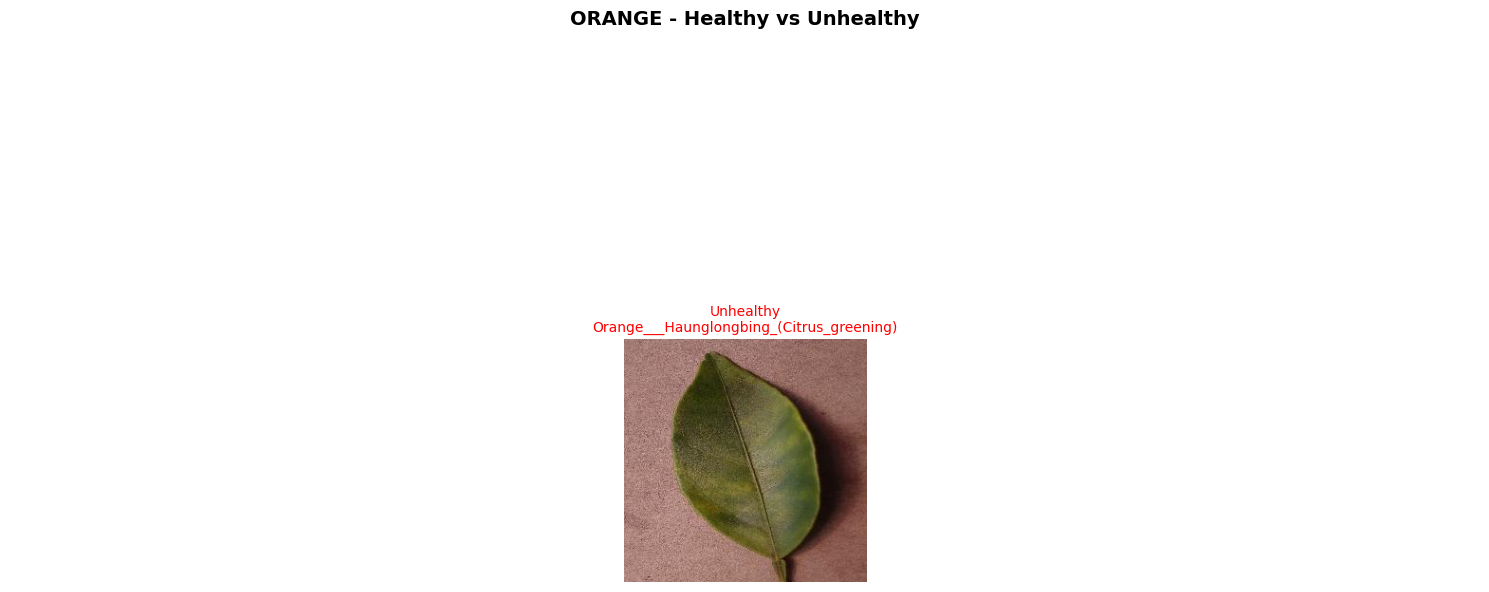

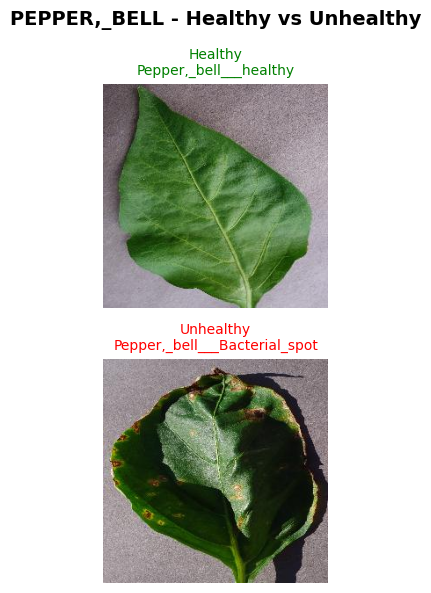

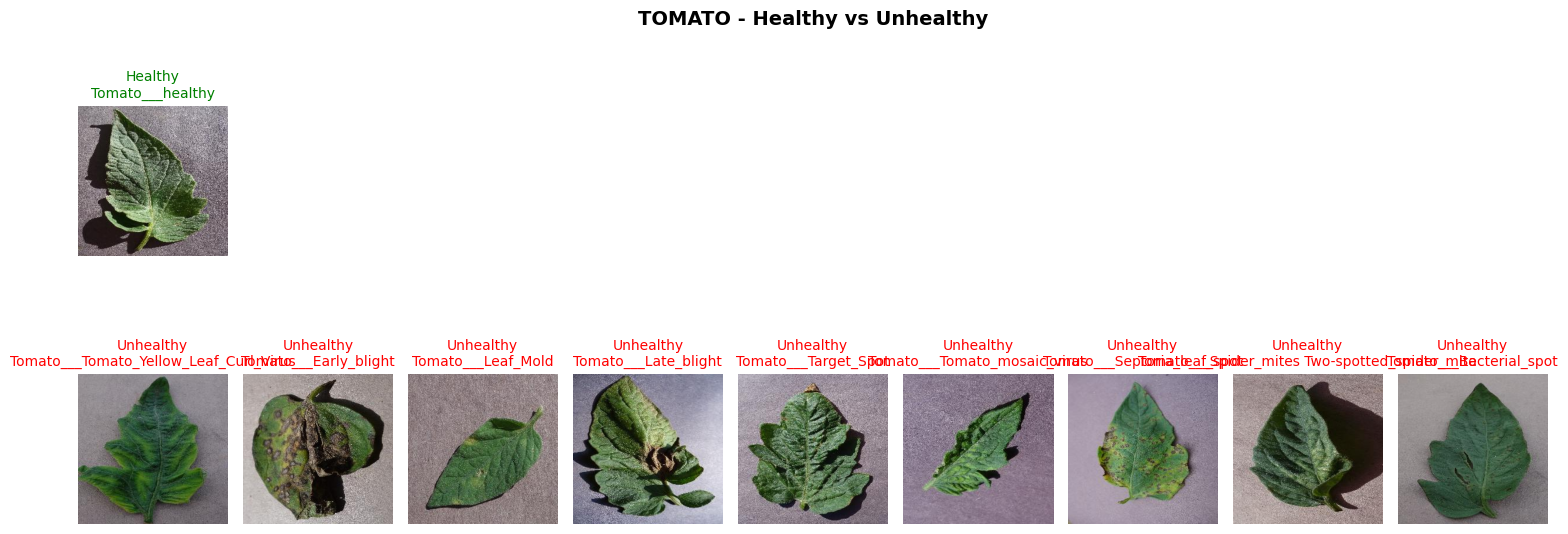

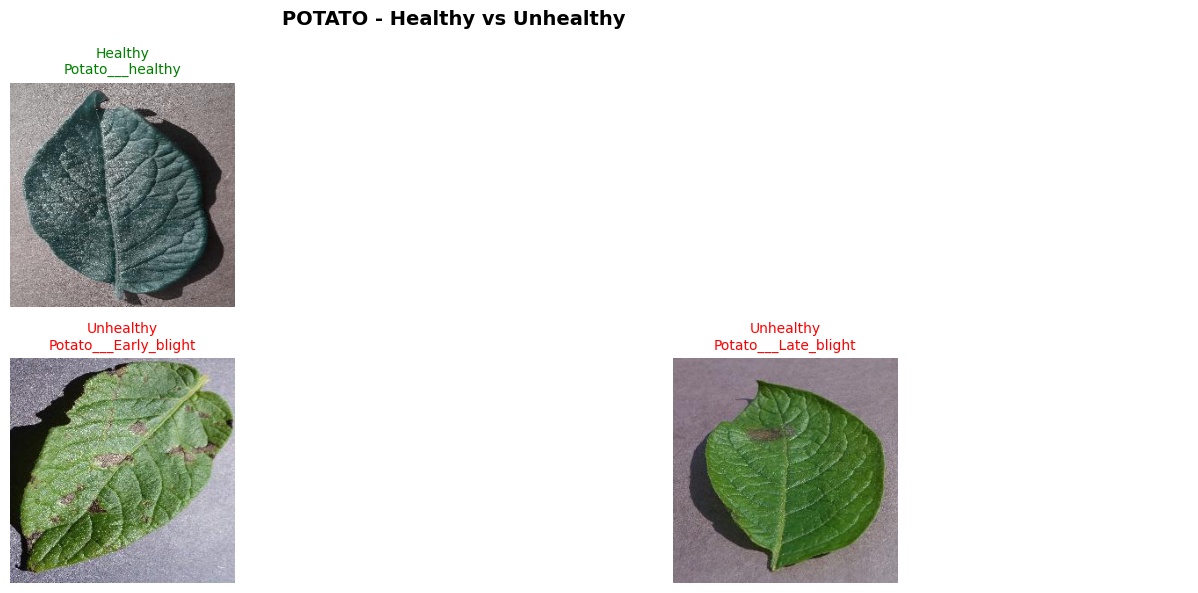

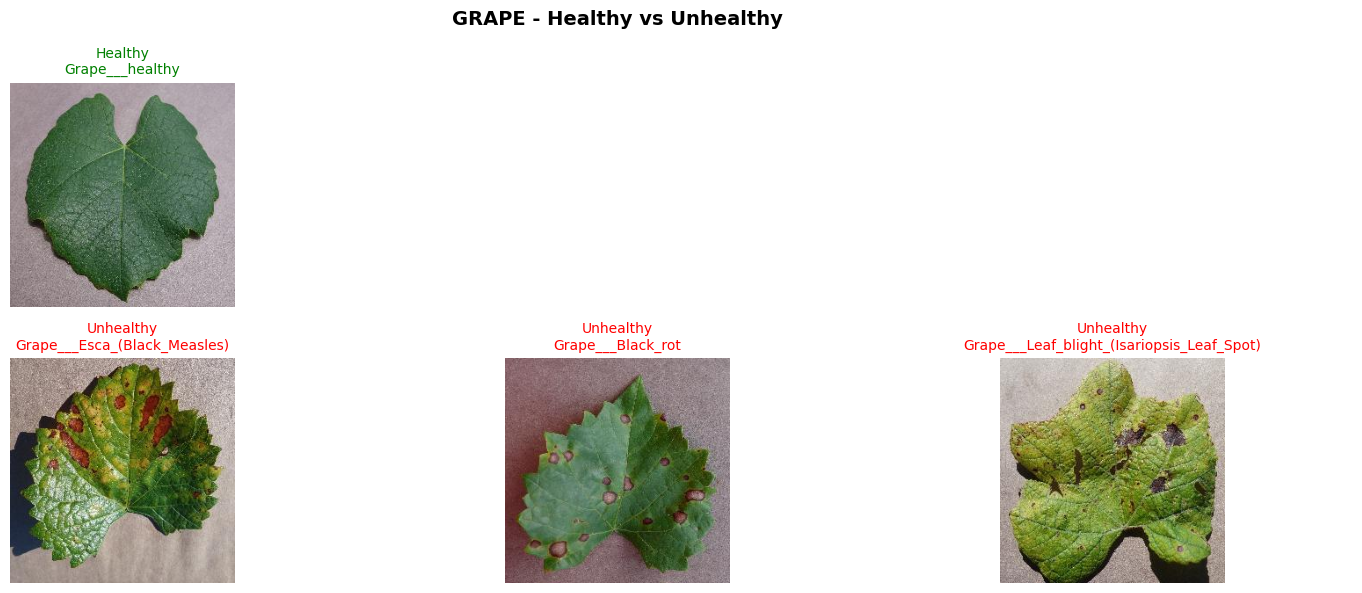

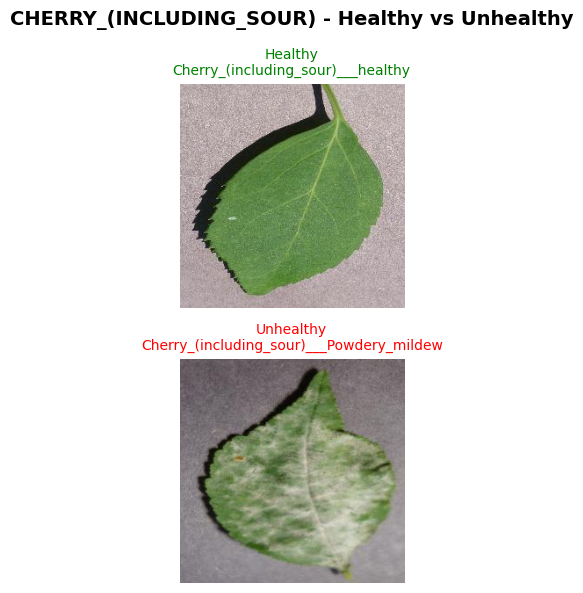

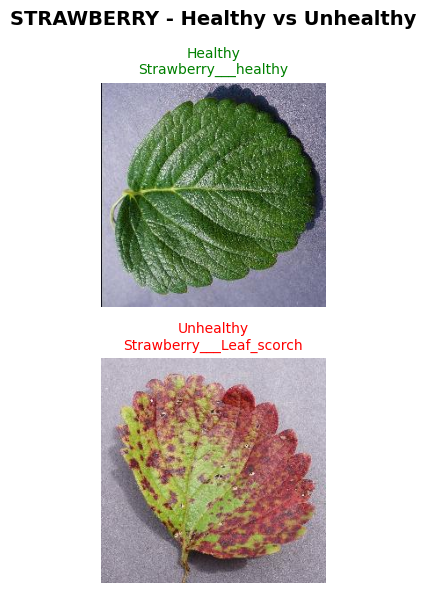

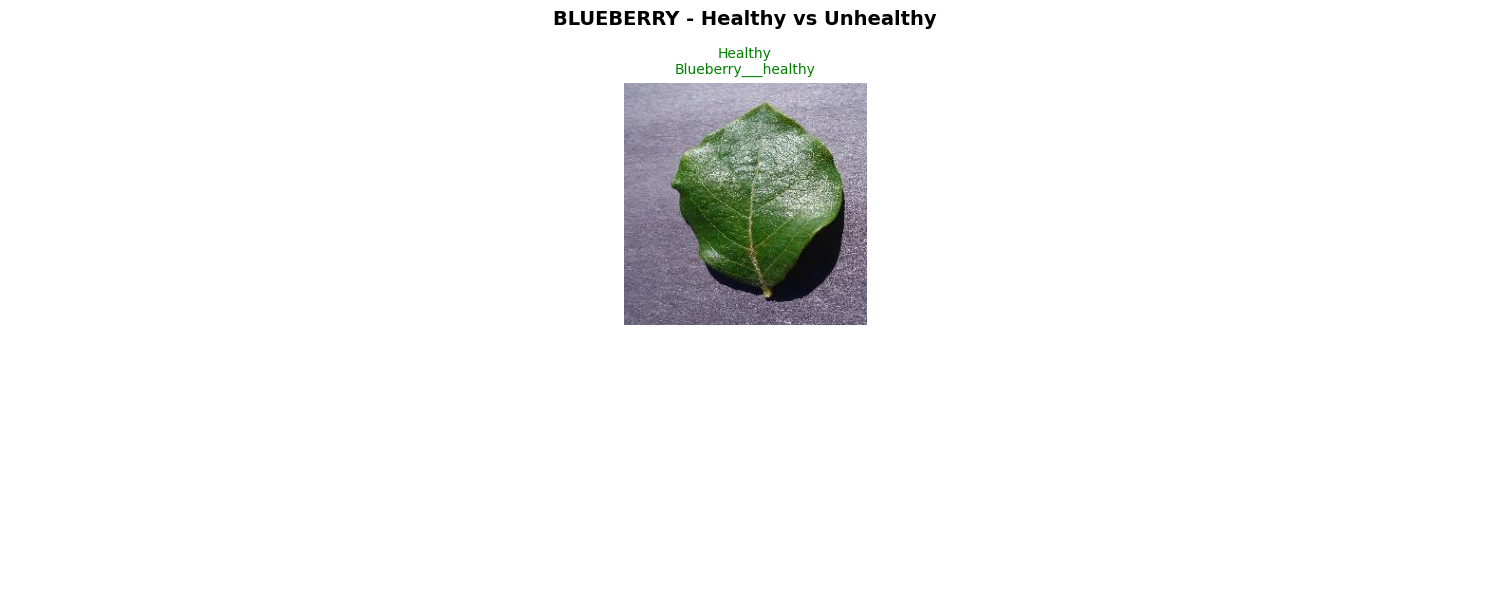

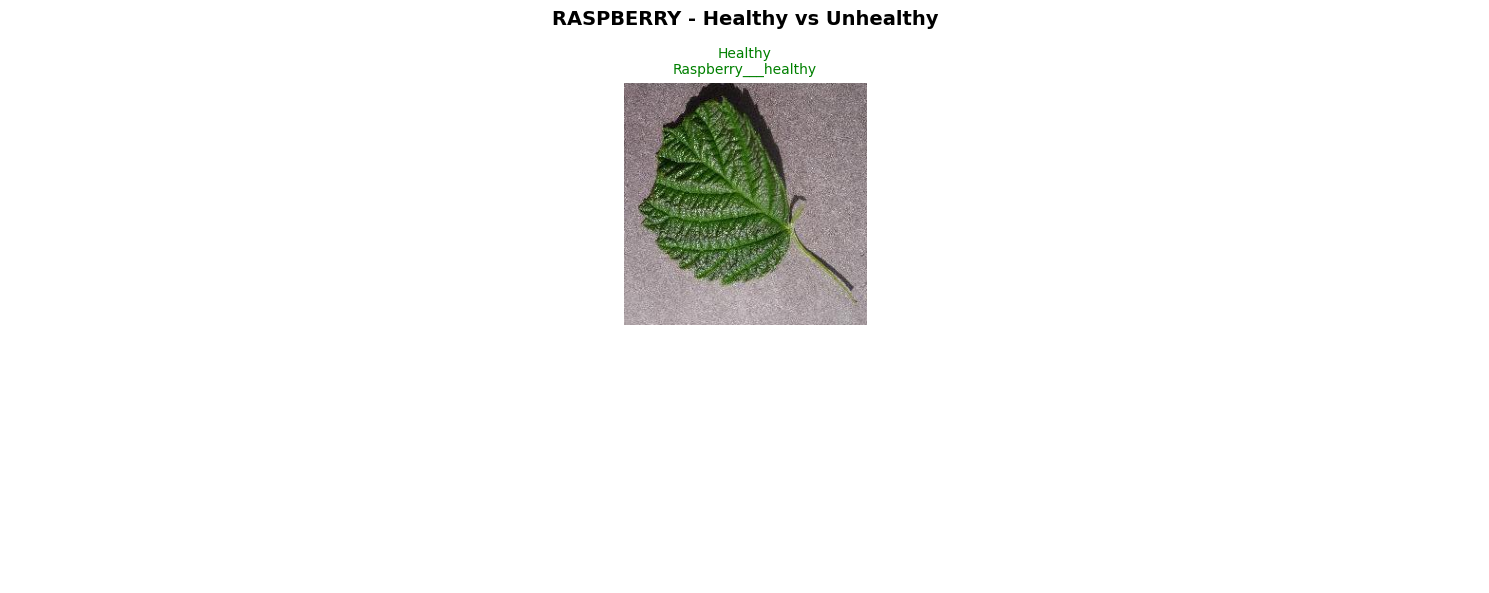

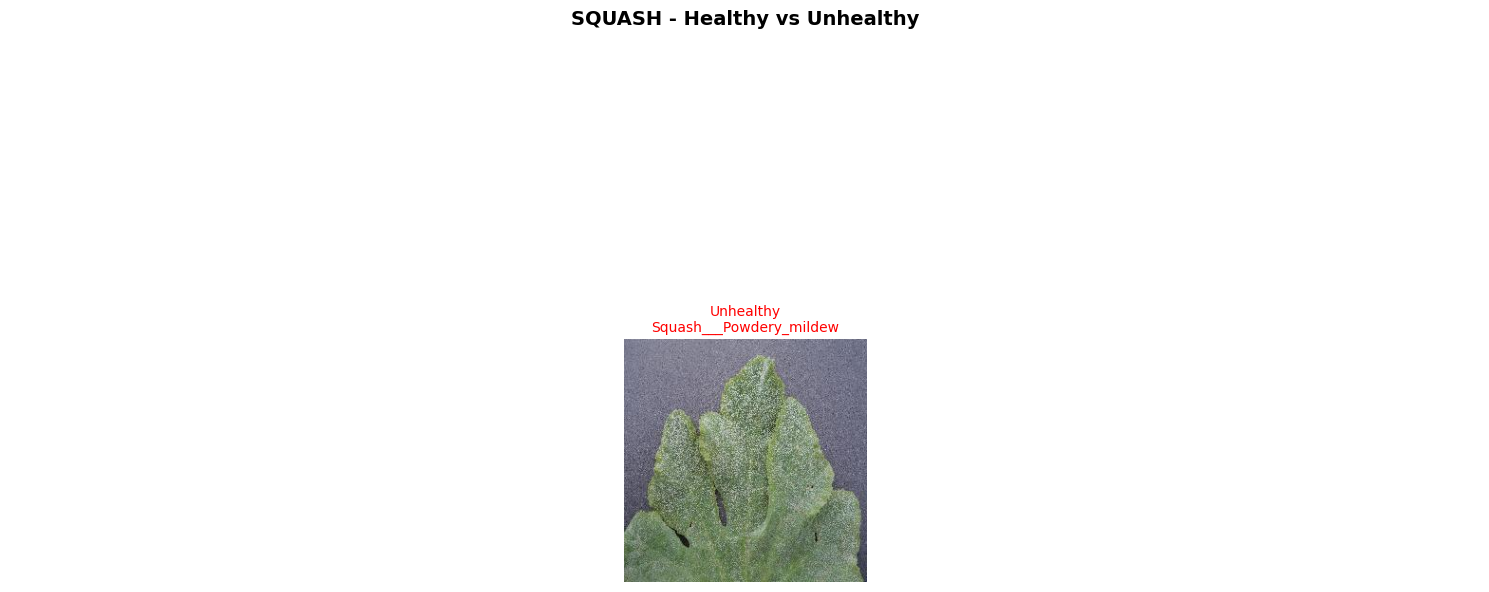

In [12]:
# Display healthy and unhealthy examples for each species
unique_species = df["species"].unique()

for species in unique_species:
    species_classes = df[df["species"] == species]["class"].tolist()
    healthy_classes = [cls for cls in species_classes if "healthy" in cls.lower()]
    unhealthy_classes = [cls for cls in species_classes if "healthy" not in cls.lower()]
    
    # Create figure with subplots
    num_cols = max(len(healthy_classes), len(unhealthy_classes))
    fig, axes = plt.subplots(2, num_cols, figsize=(15, 6))
    
    # Flatten axes for easier iteration
    if num_cols == 1:
        axes = axes.reshape(2, 1)
    
    # Display healthy examples
    for idx, cls in enumerate(healthy_classes):
        img_path = os.path.join(TRAIN_DIR, cls, os.listdir(os.path.join(TRAIN_DIR, cls))[0])
        axes[0, idx].imshow(Image.open(img_path))
        axes[0, idx].set_title(f"Healthy\n{cls}", fontsize=10, color='green')
        axes[0, idx].axis("off")
    
    # Hide unused subplots in healthy row
    for idx in range(len(healthy_classes), num_cols):
        axes[0, idx].axis("off")
    
    # Display unhealthy examples
    for idx, cls in enumerate(unhealthy_classes):
        img_path = os.path.join(TRAIN_DIR, cls, os.listdir(os.path.join(TRAIN_DIR, cls))[0])
        axes[1, idx].imshow(Image.open(img_path))
        axes[1, idx].set_title(f"Unhealthy\n{cls}", fontsize=10, color='red')
        axes[1, idx].axis("off")
    
    # Hide unused subplots in unhealthy row
    for idx in range(len(unhealthy_classes), num_cols):
        axes[1, idx].axis("off")
    
    plt.suptitle(f"{species.upper()} - Healthy vs Unhealthy", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


Disease Distribution (Total Images):
disease_type
Healthy                                 22294
Bacterial_spot                           5453
Black_rot                                3875
Early_blight                             3859
Late_blight                              3790
Powdery_mildew                           3419
Apple_scab                               2016
Haunglongbing_(Citrus_greening)          2010
Tomato_Yellow_Leaf_Curl_Virus            1961
Esca_(Black_Measles)                     1920
Northern_Leaf_Blight                     1908
Common_rust_                             1907
Leaf_Mold                                1882
Target_Spot                              1827
Tomato_mosaic_virus                      1790
Leaf_scorch                              1774
Cedar_apple_rust                         1760
Septoria_leaf_spot                       1745
Spider_mites Two-spotted_spider_mite     1741
Leaf_blight_(Isariopsis_Leaf_Spot)       1722
Cercospora_leaf_spot Gray_lea

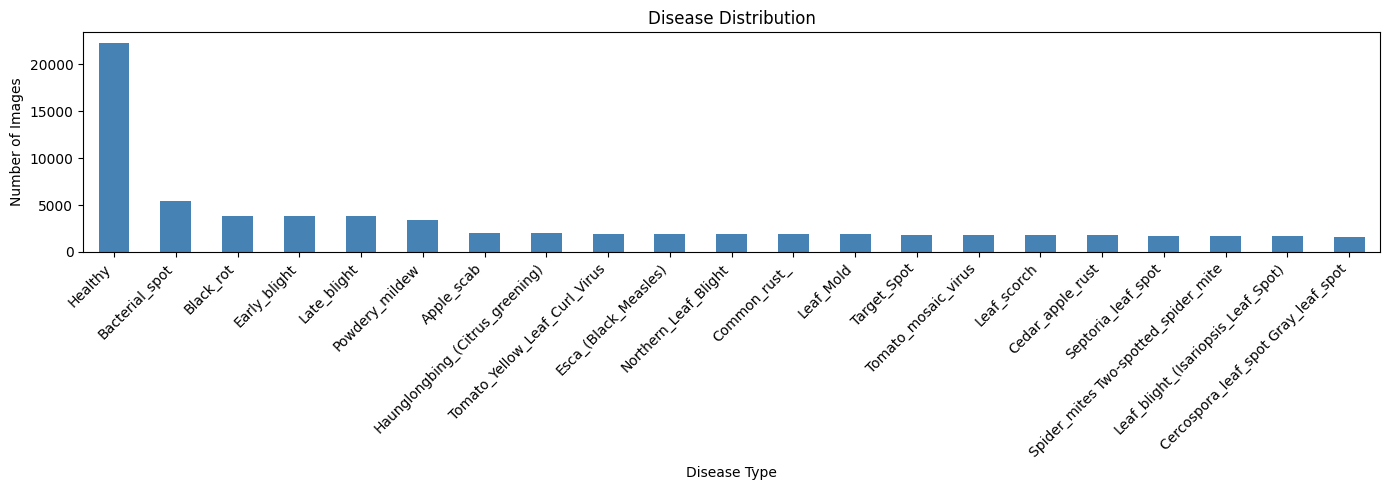


Total unique diseases/conditions: 21
Total images: 70295

All diseases:
  1. Healthy: 22294 images
  2. Bacterial_spot: 5453 images
  3. Black_rot: 3875 images
  4. Early_blight: 3859 images
  5. Late_blight: 3790 images
  6. Powdery_mildew: 3419 images
  7. Apple_scab: 2016 images
  8. Haunglongbing_(Citrus_greening): 2010 images
  9. Tomato_Yellow_Leaf_Curl_Virus: 1961 images
  10. Esca_(Black_Measles): 1920 images
  11. Northern_Leaf_Blight: 1908 images
  12. Common_rust_: 1907 images
  13. Leaf_Mold: 1882 images
  14. Target_Spot: 1827 images
  15. Tomato_mosaic_virus: 1790 images
  16. Leaf_scorch: 1774 images
  17. Cedar_apple_rust: 1760 images
  18. Septoria_leaf_spot: 1745 images
  19. Spider_mites Two-spotted_spider_mite: 1741 images
  20. Leaf_blight_(Isariopsis_Leaf_Spot): 1722 images
  21. Cercospora_leaf_spot Gray_leaf_spot: 1642 images


In [13]:
# Disease distribution analysis
df["disease"] = df["class"].apply(lambda x: x.replace("___", " "))

# Extract disease names (removing species and healthy)
diseases = []
for cls in df["disease"]:
    parts = cls.split()
    if "healthy" in cls.lower():
        diseases.append("Healthy")
    else:
        disease_name = " ".join(parts[1:]) if len(parts) > 1 else "Unknown"
        diseases.append(disease_name)

df["disease_type"] = diseases

# Count total images per disease (sum of all images in each disease)
disease_counts = df.groupby("disease_type")["count"].sum().sort_values(ascending=False)
print("\nDisease Distribution (Total Images):")
print(disease_counts)

# Bar chart
disease_counts.plot(kind="bar", figsize=(14, 5), title="Disease Distribution", color='steelblue')
plt.ylabel("Number of Images")
plt.xlabel("Disease Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# List all diseases
print(f"\nTotal unique diseases/conditions: {len(disease_counts)}")
print(f"Total images: {disease_counts.sum()}")
print("\nAll diseases:")
for i, disease in enumerate(disease_counts.index, 1):
    print(f"  {i}. {disease}: {disease_counts[disease]} images")


Number of Diseases per Plant Species:
species
Tomato                     10
Apple                       4
Grape                       4
Corn_(maize)                4
Potato                      3
Cherry_(including_sour)     2
Strawberry                  2
Peach                       2
Pepper,_bell                2
Blueberry                   1
Orange                      1
Raspberry                   1
Squash                      1
Soybean                     1
Name: disease_type, dtype: int64


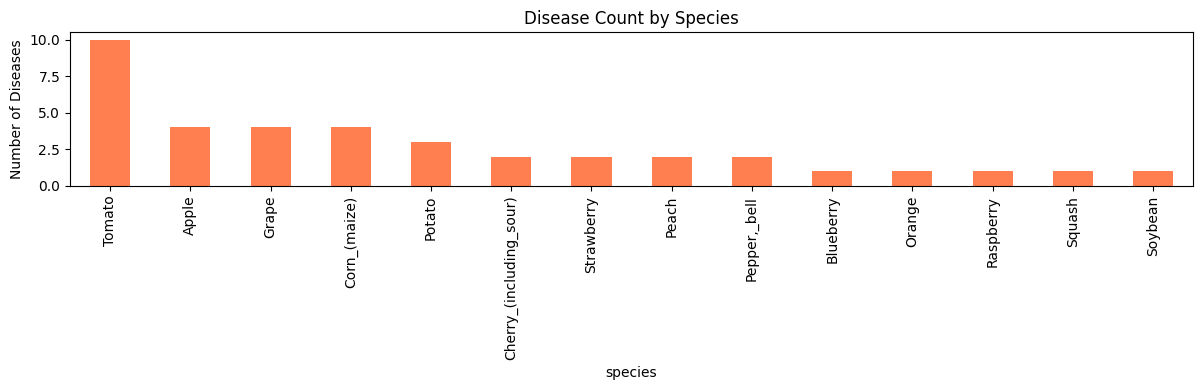

In [14]:
# Disease per plant analysis
disease_per_species = df.groupby("species")["disease_type"].nunique().sort_values(ascending=False)
print("\nNumber of Diseases per Plant Species:")
print(disease_per_species)

disease_per_species.plot(kind="bar", figsize=(12, 4), title="Disease Count by Species", color='coral')
plt.ylabel("Number of Diseases")
plt.tight_layout()
plt.show()

In [15]:
# Class imbalance heatmap - total images per label
import seaborn as sns

heatmap_data = df.groupby(["species", "label"])["count"].sum().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", cbar_kws={"label": "Total Images"})
plt.title("Class Imbalance: Healthy vs Diseased per Species (Total Images)")
plt.tight_layout()
plt.show()

In [16]:
# Top vs Bottom classes comparison
top_3 = df.nlargest(3, "count")["class"].tolist()
bottom_3 = df.nsmallest(3, "count")["class"].tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 6))
for idx, cls in enumerate(top_3):
    img_path = os.path.join(TRAIN_DIR, cls, os.listdir(os.path.join(TRAIN_DIR, cls))[0])
    axes[0, idx].imshow(Image.open(img_path))
    axes[0, idx].set_title(f"Top 3: {cls}\n({df[df['class']==cls]['count'].values[0]} imgs)", fontsize=9)
    axes[0, idx].axis("off")

for idx, cls in enumerate(bottom_3):
    img_path = os.path.join(TRAIN_DIR, cls, os.listdir(os.path.join(TRAIN_DIR, cls))[0])
    axes[1, idx].imshow(Image.open(img_path))
    axes[1, idx].set_title(f"Bottom 3: {cls}\n({df[df['class']==cls]['count'].values[0]} imgs)", fontsize=9)
    axes[1, idx].axis("off")

plt.suptitle("Most vs Least Common Classes", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [20]:
# Data quality check
print("\nData Quality Check:")
quality_issues = []

for cls in tqdm(df["class"][:30], desc="Checking image consistency"):
    cls_path = os.path.join(TRAIN_DIR, cls)
    for img_file in os.listdir(cls_path)[:5]:
        try:
            img_path = os.path.join(cls_path, img_file)
            img = Image.open(img_path)
            if img.size != (256, 256):
                quality_issues.append(f"{cls}/{img_file}: Size {img.size}")
        except Exception as e:
            quality_issues.append(f"{cls}/{img_file}: {str(e)}")

if quality_issues:
    print(f"Found {len(quality_issues)} potential issues (showing first 5):")
    for issue in quality_issues[:5]:
        print(f"  - {issue}")
else:
    print("✓ All checked images passed quality checks")


Data Quality Check:


Checking image consistency: 100%|██████████| 30/30 [00:00<00:00, 280.24it/s]

✓ All checked images passed quality checks


In [21]:
# Color distribution analysis
import numpy as np

healthy_colors = []
diseased_colors = []

for cls in tqdm(df["class"][:20], desc="Sampling colors"):
    cls_path = os.path.join(TRAIN_DIR, cls)
    img_path = os.path.join(cls_path, os.listdir(cls_path)[0])
    img = Image.open(img_path).resize((50, 50))
    pixels = np.array(img).reshape(-1, 3).mean(axis=0)
    
    if "healthy" in cls.lower():
        healthy_colors.append(pixels)
    else:
        diseased_colors.append(pixels)

healthy_avg = np.mean(healthy_colors, axis=0) if healthy_colors else [0, 0, 0]
diseased_avg = np.mean(diseased_colors, axis=0) if diseased_colors else [0, 0, 0]

print("\nAverage Color Signature:")
print(f"  Healthy (RGB):   {healthy_avg.astype(int)}")
print(f"  Diseased (RGB):  {diseased_avg.astype(int)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.imshow([[healthy_avg/255]])
ax1.set_title("Avg Healthy Plant Color")
ax1.axis("off")

ax2.imshow([[diseased_avg/255]])
ax2.set_title("Avg Diseased Plant Color")
ax2.axis("off")

plt.tight_layout()
plt.show()

Sampling colors:   0%|          | 0/20 [00:00<?, ?it/s]

Sampling colors: 100%|██████████| 20/20 [00:00<00:00, 275.64it/s]



Average Color Signature:
  Healthy (RGB):   [122 131 114]
  Diseased (RGB):  [107 112  94]


In [24]:
# RGB Channel Analysis - Detailed breakdown by channel
print("\n" + "="*70)
print("RGB CHANNEL ANALYSIS: Healthy vs Diseased")
print("="*70)

# Collect RGB values separately for healthy and diseased plants
healthy_r, healthy_g, healthy_b = [], [], []
diseased_r, diseased_g, diseased_b = [], [], []

for cls in tqdm(df["class"][:30], desc="Analyzing RGB channels"):
    cls_path = os.path.join(TRAIN_DIR, cls)
    img_path = os.path.join(cls_path, os.listdir(cls_path)[0])
    img = Image.open(img_path).resize((50, 50))
    pixels = np.array(img).reshape(-1, 3)
    
    r_vals = pixels[:, 0]
    g_vals = pixels[:, 1]
    b_vals = pixels[:, 2]
    
    if "healthy" in cls.lower():
        healthy_r.extend(r_vals)
        healthy_g.extend(g_vals)
        healthy_b.extend(b_vals)
    else:
        diseased_r.extend(r_vals)
        diseased_g.extend(g_vals)
        diseased_b.extend(b_vals)

# Calculate statistics
print("\nCHANNEL STATISTICS:")
print(f"\nRED Channel:")
print(f"  Healthy:  mean={np.mean(healthy_r):.1f}, std={np.std(healthy_r):.1f}")
print(f"  Diseased: mean={np.mean(diseased_r):.1f}, std={np.std(diseased_r):.1f}")

print(f"\nGREEN Channel (Chlorophyll indicator):")
print(f"  Healthy:  mean={np.mean(healthy_g):.1f}, std={np.std(healthy_g):.1f}")
print(f"  Diseased: mean={np.mean(diseased_g):.1f}, std={np.std(diseased_g):.1f}")

print(f"\nBLUE Channel:")
print(f"  Healthy:  mean={np.mean(healthy_b):.1f}, std={np.std(healthy_b):.1f}")
print(f"  Diseased: mean={np.mean(diseased_b):.1f}, std={np.std(diseased_b):.1f}")

# Visualize channel distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Red channel
axes[0].hist(healthy_r, bins=50, alpha=0.6, color='green', label='Healthy', density=True)
axes[0].hist(diseased_r, bins=50, alpha=0.6, color='red', label='Diseased', density=True)
axes[0].set_title('Red Channel Distribution')
axes[0].set_xlabel('Pixel Value')
axes[0].set_ylabel('Density')
axes[0].legend()

# Green channel
axes[1].hist(healthy_g, bins=50, alpha=0.6, color='green', label='Healthy', density=True)
axes[1].hist(diseased_g, bins=50, alpha=0.6, color='red', label='Diseased', density=True)
axes[1].set_title('Green Channel Distribution')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Density')
axes[1].legend()

# Blue channel
axes[2].hist(healthy_b, bins=50, alpha=0.6, color='green', label='Healthy', density=True)
axes[2].hist(diseased_b, bins=50, alpha=0.6, color='red', label='Diseased', density=True)
axes[2].set_title('Blue Channel Distribution')
axes[2].set_xlabel('Pixel Value')
axes[2].set_ylabel('Density')
axes[2].legend()

plt.suptitle('RGB Channel Comparison: Healthy vs Diseased Plants', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


RGB CHANNEL ANALYSIS: Healthy vs Diseased


Analyzing RGB channels: 100%|██████████| 30/30 [00:00<00:00, 321.59it/s]


CHANNEL STATISTICS:

RED Channel:
  Healthy:  mean=120.4, std=50.0
  Diseased: mean=112.9, std=49.6

GREEN Channel (Chlorophyll indicator):
  Healthy:  mean=129.1, std=43.8
  Diseased: mean=115.6, std=43.1

BLUE Channel:
  Healthy:  mean=113.7, std=52.5
  Diseased: mean=99.7, std=53.2


In [ ]:
# PCA on CNN Embeddings - Advanced Image EDA
print("\n" + "="*70)
print("PCA ON CNN EMBEDDINGS: Feature Space Analysis")
print("="*70)

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load pretrained ResNet18 as feature extractor (no classifier)
model = models.resnet18(weights='IMAGENET1K_V1')
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove final FC layer
model = model.to(device)
model.eval()

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Extract embeddings for all classes
SAMPLES_PER_CLASS = 10  # Number of images to sample per class
print(f"\nExtracting CNN embeddings ({SAMPLES_PER_CLASS} images per class)...")

embeddings = []
labels = []
class_names_list = []
colors_list = []

for cls in tqdm(df["class"], desc="Processing classes"):
    cls_path = os.path.join(TRAIN_DIR, cls)
    img_files = os.listdir(cls_path)[:SAMPLES_PER_CLASS]
    
    for img_file in img_files:
        try:
            img_path = os.path.join(cls_path, img_file)
            img = Image.open(img_path).convert('RGB')
            img_tensor = transform(img).unsqueeze(0).to(device)
            
            # Extract embedding
            with torch.no_grad():
                embedding = model(img_tensor)
                embedding = embedding.squeeze().cpu().numpy()
            
            embeddings.append(embedding)
            labels.append(df[df["class"] == cls]["label"].values[0])
            class_names_list.append(cls)
            colors_list.append('green' if 'healthy' in cls.lower() else 'red')
        except Exception as e:
            continue

embeddings = np.array(embeddings)
print(f"✓ Extracted {len(embeddings)} embeddings of dimension {embeddings.shape[1]}")
print(f"  → {len(df['class'].unique())} classes × {SAMPLES_PER_CLASS} samples = {len(embeddings)} total points")

# Apply PCA
print("\nApplying PCA...")
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

embeddings_2d = pca_2d.fit_transform(embeddings_scaled)
embeddings_3d = pca_3d.fit_transform(embeddings_scaled)

print(f"PCA 2D - Explained variance: {pca_2d.explained_variance_ratio_.sum():.2%}")
print(f"PCA 3D - Explained variance: {pca_3d.explained_variance_ratio_.sum():.2%}")

# Visualize 2D PCA
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Healthy vs Diseased
for label, color, marker in [('healthy', 'green', 'o'), ('diseased', 'red', '^')]:
    mask = np.array(labels) == label
    axes[0].scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                    c=color, label=f'{label.capitalize()} (n={mask.sum()})', alpha=0.6, s=50, marker=marker)
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
axes[0].set_title(f'PCA: Healthy vs Diseased Separation\n(Total: {len(embeddings)} points)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: By Species (top 5 species)
top_species = df.groupby("species")["count"].sum().nlargest(5).index
species_colors = plt.cm.tab10(np.linspace(0, 1, len(top_species)))

for idx, species in enumerate(top_species):
    mask = [species in cn for cn in class_names_list]
    n_points = sum(mask)
    axes[1].scatter(embeddings_2d[np.array(mask), 0], embeddings_2d[np.array(mask), 1],
                    c=[species_colors[idx]], label=f'{species} (n={n_points})', alpha=0.6, s=50)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
axes[1].set_title('PCA: Top 5 Species Clustering')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3D Visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for label, color, marker in [('healthy', 'green', 'o'), ('diseased', 'red', '^')]:
    mask = np.array(labels) == label
    ax.scatter(embeddings_3d[mask, 0], embeddings_3d[mask, 1], embeddings_3d[mask, 2],
               c=color, label=f'{label.capitalize()} (n={mask.sum()})', alpha=0.6, s=50, marker=marker)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax.set_title(f'3D PCA: CNN Embedding Space ({len(embeddings)} points)')
ax.legend()
plt.tight_layout()
plt.show()

# Analyze outliers and distances
print("\n" + "="*70)
print("EMBEDDING SPACE INSIGHTS:")
print("="*70)

# Calculate centroids for healthy vs diseased
healthy_mask = np.array(labels) == 'healthy'
diseased_mask = np.array(labels) == 'diseased'

healthy_centroid = embeddings_2d[healthy_mask].mean(axis=0)
diseased_centroid = embeddings_2d[diseased_mask].mean(axis=0)

centroid_distance = np.linalg.norm(healthy_centroid - diseased_centroid)
print(f"\n1. Healthy-Diseased Separation: {centroid_distance:.2f}")
print("   → Higher value = better separation for classification")

# Find most similar diseases (closest in embedding space)
print("\n2. Most Similar Disease Pairs:")
disease_classes = [cn for cn, lbl in zip(class_names_list, labels) if lbl == 'diseased']
disease_embeddings = embeddings_2d[[lbl == 'diseased' for lbl in labels]]
unique_diseases = list(set(disease_classes))[:20]

if len(unique_diseases) > 1:
    disease_centroids = {}
    for disease in unique_diseases:
        mask = [disease == dc for dc in disease_classes]
        if any(mask):
            disease_centroids[disease] = disease_embeddings[np.array(mask)].mean(axis=0)
    
    distances = {}
    disease_list = list(disease_centroids.keys())
    for i, d1 in enumerate(disease_list):
        for d2 in disease_list[i+1:]:
            dist = np.linalg.norm(disease_centroids[d1] - disease_centroids[d2])
            distances[(d1, d2)] = dist
    
    closest_pairs = sorted(distances.items(), key=lambda x: x[1])[:5]
    for (d1, d2), dist in closest_pairs:
        print(f"   • {d1[:30]}... ↔ {d2[:30]}... (dist: {dist:.2f})")

# Find outliers
print("\n3. Outlier Classes (unusual feature patterns):")
class_distances = []
for cls in set(class_names_list):
    mask = [cls == cn for cn in class_names_list]
    if sum(mask) > 0:
        cls_points = embeddings_2d[np.array(mask)]
        cls_centroid = cls_points.mean(axis=0)
        avg_dist = np.mean([np.linalg.norm(pt - cls_centroid) for pt in cls_points])
        class_distances.append((cls, avg_dist))

outliers = sorted(class_distances, key=lambda x: x[1], reverse=True)[:5]
for cls, dist in outliers:
    count = df[df["class"] == cls]["count"].values[0] if cls in df["class"].values else 0
    print(f"   • {cls}: spread={dist:.2f}, samples={count}")

print("\n" + "="*70)
print("INTERPRETATION:")
print("  ✓ Tight clusters = similar visual features")
print("  ✓ Overlap between healthy/diseased = harder classification")
print("  ✓ Outliers may need special attention in training")
print("="*70)


PCA ON CNN EMBEDDINGS: Feature Space Analysis

PCA ON CNN EMBEDDINGS: Feature Space Analysis
Using device: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Extracting CNN embeddings...


Processing classes: 100%|██████████| 38/38 [00:05<00:00,  7.13it/s]


Extracted 570 embeddings of dimension 512

Applying PCA...
PCA 2D - Explained variance: 13.20%
PCA 3D - Explained variance: 18.25%


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



EMBEDDING SPACE INSIGHTS:

1. Healthy-Diseased Separation: 4.75
   → Higher value = better separation for classification

2. Most Similar Disease Pairs:
   • Tomato___Tomato_Yellow_Leaf_Cu... ↔ Tomato___Septoria_leaf_spot... (dist: 0.27)
   • Cherry_(including_sour)___Powd... ↔ Orange___Haunglongbing_(Citrus... (dist: 0.41)
   • Apple___Cedar_apple_rust... ↔ Tomato___Leaf_Mold... (dist: 0.94)
   • Tomato___Tomato_Yellow_Leaf_Cu... ↔ Cherry_(including_sour)___Powd... (dist: 1.07)
   • Cherry_(including_sour)___Powd... ↔ Tomato___Septoria_leaf_spot... (dist: 1.20)

3. Outlier Classes (unusual feature patterns):
   • Tomato___Late_blight: spread=6.09, samples=1851
   • Potato___Late_blight: spread=5.84, samples=1939
   • Corn_(maize)___Northern_Leaf_Blight: spread=5.45, samples=1908
   • Tomato___healthy: spread=5.37, samples=1926
   • Tomato___Early_blight: spread=5.05, samples=1920

INTERPRETATION:
  ✓ Tight clusters = similar visual features
  ✓ Overlap between healthy/diseased = hard

Processing classes: 100%|██████████| 38/38 [00:00<00:00, 47.35it/s]


Extracted 114 embeddings of dimension 512

Applying PCA...
PCA 2D - Explained variance: 13.95%
PCA 3D - Explained variance: 19.69%



EMBEDDING SPACE INSIGHTS:

1. Healthy-Diseased Separation: 7.43
   → Higher value = better separation for classification

2. Most Similar Disease Pairs:
   • Tomato___Spider_mites Two-spot... ↔ Tomato___Target_Spot... (dist: 0.28)
   • Grape___Esca_(Black_Measles)... ↔ Potato___Late_blight... (dist: 0.43)
   • Apple___Apple_scab... ↔ Tomato___Leaf_Mold... (dist: 0.65)
   • Tomato___Tomato_Yellow_Leaf_Cu... ↔ Tomato___Late_blight... (dist: 0.75)
   • Apple___Cedar_apple_rust... ↔ Tomato___Leaf_Mold... (dist: 1.00)

3. Outlier Classes (unusual feature patterns):
   • Corn_(maize)___Northern_Leaf_Blight: spread=7.39, samples=1908
   • Tomato___Septoria_leaf_spot: spread=6.70, samples=1745
   • Tomato___Late_blight: spread=6.47, samples=1851
   • Squash___Powdery_mildew: spread=5.90, samples=1736
   • Potato___Late_blight: spread=5.26, samples=1939

INTERPRETATION:
  ✓ Tight clusters = similar visual features
  ✓ Overlap between healthy/diseased = harder classification
  ✓ Outliers may ne